## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Descargar todas las bases de datos:

- importar csv de consumo_cliente potencia
- importar csv de consumo_cliente energia
- importar csv de precios_fijos
- importar csv de cliente_estudio_ahorro. 

In [2]:
bd_consumo_energia_cliente = pd.read_csv("../Data/csv/bd_consumo_energia_cliente.csv")
bd_consumo_potencia_cliente = pd.read_csv("../Data/csv/bd_consumo_potencia_cliente.csv")
bd_precios_fijos = pd.read_csv("../Data/csv/precios_fijos.csv")
bd_cliente_estudio_de_ahorro_modelo = pd.read_csv("../Data/csv/cliente_estudio_de_ahorro_modelo.csv")

#### Visualizar DF

In [3]:
bd_cliente_estudio_de_ahorro_modelo

,Titular_de_la_Cuenta,CIF_/_NIF,Persona_de_Contacto,Email,Telefono,Cups,Dirección_completa,Tipo_de_cliente,Subtipo_de_cliente,Mercado_regulado,...,Precio_Energia_P5,Precio_Energia_P6,Precio_Potencia_P1,Precio_Potencia_P2,Precio_Potencia_P3,Precio_Potencia_P4,Precio_Potencia_P5,Precio_Potencia_P6,Precio_Contador,Precio_Otros _Servicios_€/mes
0,"Azaya, S.L.",B56445566,Amalia Zunzunegui,trv.pepe@gmail.com,699792928,ES0021000007463134RE,"Cmno Estrella Torre Tolanca, Km 7,5, 45100 Son...",Empresa,Finca Rustica,no,...,0.114617,0.094279,0.162119,0.099974,0.022925,0.162119,0.099974,0.022925,0.394474,0


In [4]:
bd_consumo_energia_cliente

,CUPS,ES0021000007463134RE
0,P1,4569
1,P2,15902
2,P3,10843
3,P4,5577
4,P5,4667
5,P6,12156


In [5]:
bd_consumo_potencia_cliente

,a,b,Potencia,kWp
0,Potencia Contratada (kWh),P1;12,P1,12
1,Potencia Contratada (kWh),P2;15,P2,15
2,Potencia Contratada (kWh),P3;20,P3,20
3,Potencia Contratada (kWh),P4;0,P4,0
4,Potencia Contratada (kWh),P5;0,P5,0
5,Potencia Contratada (kWh),P6;0,P6,0


In [6]:
bd_precios_fijos

,Comercializadora,Tarifa,Precio_Potencia_P1,Precio_Potencia_P2,Precio_Potencia_P3,Precio_Potencia_P4,Precio_Potencia_P5,Precio_Potencia_P6,Precio_Energía_P1,Precio_Energía_P2,Precio_Energía_P3,Precio_Energía_P4,Precio_Energía_P5,Precio_Energía_P6,Fecha_Inicio,Fecha_Finalizacion
0,CYE,2.0. A,0.038043,0.038043,0.038043,0.038043,0.038043,0.038043,0.109125,0.109125,0.109125,0.109125,0.109125,0.109125,2020-11-16,0
1,CYE,2.0. DHA,0.038043,0.038043,0.038043,0.038043,0.038043,0.038043,0.130285,0.130285,0.130285,0.130285,0.130285,0.130285,2020-11-16,0
2,CYE,2.1. A,0.044445,0.044445,0.044445,0.044445,0.044445,0.044445,0.122458,0.122458,0.122458,0.122458,0.122458,0.122458,2020-11-16,0
3,CYE,2.1. DHA,0.044445,0.044445,0.044445,0.044445,0.044445,0.044445,0.142841,0.142841,0.142841,0.142841,0.142841,0.142841,2020-11-16,0
4,CYE,3.0. A,0.040729,0.024437,0.016292,0.040729,0.024437,0.016292,0.092978,0.092978,0.092978,0.092978,0.092978,0.092978,2020-11-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Opcion,2.0. DHA,0.038043,0.038043,0.038043,0.038043,0.038043,0.038043,0.151545,0.151545,0.151545,0.151545,0.151545,0.151545,2020-03-01,2019-04-01 00:00:00
158,Opcion,2.1. A,0.044445,0.044445,0.044445,0.044445,0.044445,0.044445,0.145133,0.145133,0.145133,0.145133,0.145133,0.145133,2020-03-01,2019-04-01 00:00:00
159,Opcion,2.1. DHA,0.044445,0.044445,0.044445,0.044445,0.044445,0.044445,0.164125,0.164125,0.164125,0.164125,0.164125,0.164125,2020-03-01,2019-04-01 00:00:00
160,Opcion,3.0. A,0.040729,0.024437,0.016292,0.040729,0.024437,0.016292,0.112716,0.112716,0.112716,0.112716,0.112716,0.112716,2020-03-01,2019-04-01 00:00:00


# Estudio Fijo

## 1er Paso para Estudio de Ahorro - Coste total de 1 año comercializadora actual 

#### Coste de la Energía 
la columna de precio_energía de la BD_CLiente_Estudio_de_ahorro lo multiplicamos por bd_consumo_cliente el consumo anual segun periodo. 

In [7]:
coste_energía_actual = ((bd_cliente_estudio_de_ahorro_modelo["Precio_Energia_P1"] * bd_consumo_energia_cliente.iloc[0][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Energia_P2"] * bd_consumo_energia_cliente.iloc[1][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Energia_P3"] * bd_consumo_energia_cliente.iloc[2][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Energia_P4"] * bd_consumo_energia_cliente.iloc[3][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Energia_P5"] * bd_consumo_energia_cliente.iloc[4][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Energia_P6"] * bd_consumo_energia_cliente.iloc[5][-1]) )

In [8]:
coste_energía_actual

0    5756.660616
dtype: float64

#### Coste de la Potencia 
(el precio_potencia de la BD_CLiente_Estudio_de_ahorro lo multiplicamos por bd_consumo_cliente la potencia segun periodo) multiplicado por 365 días. 

In [9]:
coste_potencia_actual =((bd_cliente_estudio_de_ahorro_modelo["Precio_Potencia_P1"] * bd_consumo_potencia_cliente.iloc[0][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Potencia_P2"] * bd_consumo_potencia_cliente.iloc[1][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Potencia_P3"] * bd_consumo_potencia_cliente.iloc[2][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Potencia_P4"] * bd_consumo_potencia_cliente.iloc[3][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Potencia_P5"] * bd_consumo_potencia_cliente.iloc[4][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Potencia_P6"] * bd_consumo_potencia_cliente.iloc[5][-1]) ) * 365  

In [10]:
coste_potencia_actual

0    1424.79137
dtype: float64

#### impuesto energía 
(energía + potencia) multilplicado por 5,11%


In [11]:
coste_impuesto_energia = (coste_potencia_actual + coste_energía_actual)* 0.0511

In [12]:
coste_impuesto_energia

0    366.972196
dtype: float64

#### precio contador 
bd_consumo_cliente del precio_del_contador multiplicado por 365 días. 

In [13]:
coste_contador = bd_cliente_estudio_de_ahorro_modelo["Precio_Contador"]*365

In [14]:
coste_contador

0    143.982895
Name: Precio_Contador, dtype: float64

#### iva 
(energía + potencia + impuesto energía + precio contador) multiplicado 21%

In [15]:
coste_iva = (coste_energía_actual + coste_potencia_actual + coste_impuesto_energia + coste_contador) * 0.21

In [16]:
coste_iva

0    1615.405486
dtype: float64

#### coste total de factura actual 
energía + potencia + impuesto energía + precio contador + iva

In [17]:
actual_coste_anual_cliente = (coste_energía_actual + coste_potencia_actual + coste_impuesto_energia + coste_contador + coste_iva)

In [18]:
actual_coste_anual_cliente

0    9307.812563
dtype: float64

### Función para el importe de factura actual 1 año del cliente

In [19]:
def importe_factura_año():
    coste_energía_actual = ((bd_cliente_estudio_de_ahorro_modelo["Precio_Energia_P1"] * bd_consumo_energia_cliente.iloc[0][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Energia_P2"] * bd_consumo_energia_cliente.iloc[1][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Energia_P3"] * bd_consumo_energia_cliente.iloc[2][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Energia_P4"] * bd_consumo_energia_cliente.iloc[3][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Energia_P5"] * bd_consumo_energia_cliente.iloc[4][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Energia_P6"] * bd_consumo_energia_cliente.iloc[5][-1]) )
    coste_potencia_actual =((bd_cliente_estudio_de_ahorro_modelo["Precio_Potencia_P1"] * bd_consumo_potencia_cliente.iloc[0][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Potencia_P2"] * bd_consumo_potencia_cliente.iloc[1][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Potencia_P3"] * bd_consumo_potencia_cliente.iloc[2][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Potencia_P4"] * bd_consumo_potencia_cliente.iloc[3][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Potencia_P5"] * bd_consumo_potencia_cliente.iloc[4][-1]) +
                        (bd_cliente_estudio_de_ahorro_modelo["Precio_Potencia_P6"] * bd_consumo_potencia_cliente.iloc[5][-1]) ) * 365  
    coste_impuesto_energia = (coste_potencia_actual + coste_energía_actual)* 0.0511
    coste_contador = bd_cliente_estudio_de_ahorro_modelo["Precio_Contador"]*365
    coste_iva = (coste_energía_actual + coste_potencia_actual + coste_impuesto_energia + coste_contador) * 0.21
    actual_coste_anual_cliente = (coste_energía_actual + coste_potencia_actual + coste_impuesto_energia + coste_contador + coste_iva)
    return(actual_coste_anual_cliente)
    

In [20]:
importe_factura_año()

0    9307.812563
dtype: float64

## 2do Paso para Estudio de Ahorro - Coste total de 1 año con nueva comercializadora  

#### coste de la energía 


multiplicar la columna de consumo en BD_Consumo_Cliente con con la columna de precios de la BD_Precios_Fijos cuya fecha de finalización sea 0, y la tarifa igual a la columna de BD_Estudio_Ahorro_Cliente  Que se quede el resultado más barato.


In [21]:
tarifa_df = bd_precios_fijos.loc[bd_precios_fijos["Tarifa"] == bd_cliente_estudio_de_ahorro_modelo["Tarifa"].values[0]]
precios_vigentes_comercializadora_df = tarifa_df.loc[tarifa_df["Fecha_Finalizacion"] == '0']


In [22]:
precios_vigentes_comercializadora_df

,Comercializadora,Tarifa,Precio_Potencia_P1,Precio_Potencia_P2,Precio_Potencia_P3,Precio_Potencia_P4,Precio_Potencia_P5,Precio_Potencia_P6,Precio_Energía_P1,Precio_Energía_P2,Precio_Energía_P3,Precio_Energía_P4,Precio_Energía_P5,Precio_Energía_P6,Fecha_Inicio,Fecha_Finalizacion
5,CYE,3.1. A,0.059173,0.036491,0.008368,0.059173,0.036491,0.008368,0.081012,0.081012,0.081012,0.081012,0.081012,0.081012,2020-11-16,0
17,Sun_Air_One,3.1. A,0.059173,0.036491,0.008368,0.059173,0.036491,0.008368,0.080410,0.080410,0.080410,0.080410,0.080410,0.080410,2020-09-08,0
29,Audax,3.1. A,0.059173,0.036491,0.008368,0.059173,0.036491,0.008368,0.078740,0.078740,0.078740,0.078740,0.078740,0.078740,2020-11-17,0
41,Opcion,3.1. A,0.059173,0.036491,0.008368,0.059173,0.036491,0.008368,0.082796,0.082796,0.082796,0.082796,0.082796,0.082796,2020-12-01,0


In [23]:
coste_energia_nuevo_comercializadoras = ((precios_vigentes_comercializadora_df['Precio_Energía_P1'] * bd_consumo_energia_cliente.iloc[0][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Energía_P2'] * bd_consumo_energia_cliente.iloc[1][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Energía_P3'] * bd_consumo_energia_cliente.iloc[2][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Energía_P4'] * bd_consumo_energia_cliente.iloc[3][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Energía_P5'] * bd_consumo_energia_cliente.iloc[4][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Energía_P6'] * bd_consumo_energia_cliente.iloc[5][-1])
                      )

In [24]:
coste_energia_nuevo_comercializadoras

5     4351.466423
17    4319.142740
29    4229.440360
41    4447.287917
dtype: float64

In [25]:
coste_potencia_nuevo_comercializadoras = ((precios_vigentes_comercializadora_df['Precio_Potencia_P1'] * bd_consumo_potencia_cliente.iloc[0][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Potencia_P2'] * bd_consumo_potencia_cliente.iloc[1][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Potencia_P3'] * bd_consumo_potencia_cliente.iloc[2][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Potencia_P4'] * bd_consumo_potencia_cliente.iloc[3][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Potencia_P5'] * bd_consumo_potencia_cliente.iloc[4][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Potencia_P6'] * bd_consumo_potencia_cliente.iloc[5][-1]) )* 365

In [26]:
coste_potencia_nuevo_comercializadoras

5     520.050748
17    520.050748
29    520.050748
41    520.050748
dtype: float64

### Otros Costes de la Factura Nueva

In [27]:
coste_impuesto_energia_nuevo = ((coste_energia_nuevo_comercializadoras + coste_potencia_nuevo_comercializadoras )* 0.0511)

In [28]:
coste_impuesto_energia_nuevo

5     248.934527
17    247.282787
29    242.698996
41    253.831006
dtype: float64

#### precio contador 
bd_consumo_cliente del precio_del_contador multiplicado por 365 días. 

In [29]:
precios_vigentes_comercializadora_df['precio_contador'] = bd_cliente_estudio_de_ahorro_modelo["Precio_Contador"].values[0]*365
coste_contador_nuevo = precios_vigentes_comercializadora_df["precio_contador"]
coste_contador_nuevo

<ipython-input-29-6aeb39f6f06a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_vigentes_comercializadora_df['precio_contador'] = bd_cliente_estudio_de_ahorro_modelo["Precio_Contador"].values[0]*365


5     143.982895
17    143.982895
29    143.982895
41    143.982895
Name: precio_contador, dtype: float64

#### iva 
(energía + potencia + impuesto energía + precio contador) multiplicado 21%

In [30]:
coste_iva_nuevo = (coste_energia_nuevo_comercializadoras + coste_potencia_nuevo_comercializadoras + coste_impuesto_energia_nuevo + coste_contador_nuevo) * 0.21

In [31]:
coste_impuesto_energia_nuevo

5     248.934527
17    247.282787
29    242.698996
41    253.831006
dtype: float64

In [32]:
coste_iva_nuevo

5     1105.531265
17    1098.396426
29    1078.596330
41    1126.682039
dtype: float64

#### coste total de factura actual 
energía + potencia + impuesto energía + precio contador + iva

In [33]:
nuevo_coste_anual_cliente = (coste_energia_nuevo_comercializadoras + coste_potencia_nuevo_comercializadoras + coste_impuesto_energia_nuevo + coste_contador_nuevo + coste_iva_nuevo)

In [34]:
nuevo_coste_anual_cliente

5     6369.965858
17    6328.855596
29    6214.769329
41    6491.834605
dtype: float64

### Función para el importe de factura nueva 1 año del cliente

In [35]:
def importe_nuevas_facturas():
    tarifa_df = bd_precios_fijos.loc[bd_precios_fijos["Tarifa"] == bd_cliente_estudio_de_ahorro_modelo["Tarifa"].values[0]]
    precios_vigentes_comercializadora_df = tarifa_df.loc[tarifa_df["Fecha_Finalizacion"] == '0']
    coste_energia_nuevo_comercializadoras = ((precios_vigentes_comercializadora_df['Precio_Energía_P1'] * bd_consumo_energia_cliente.iloc[0][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Energía_P2'] * bd_consumo_energia_cliente.iloc[1][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Energía_P3'] * bd_consumo_energia_cliente.iloc[2][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Energía_P4'] * bd_consumo_energia_cliente.iloc[3][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Energía_P5'] * bd_consumo_energia_cliente.iloc[4][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Energía_P6'] * bd_consumo_energia_cliente.iloc[5][-1])
                      )
    coste_potencia_nuevo_comercializadoras = ((precios_vigentes_comercializadora_df['Precio_Potencia_P1'] * bd_consumo_potencia_cliente.iloc[0][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Potencia_P2'] * bd_consumo_potencia_cliente.iloc[0][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Potencia_P3'] * bd_consumo_potencia_cliente.iloc[0][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Potencia_P4'] * bd_consumo_potencia_cliente.iloc[0][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Potencia_P5'] * bd_consumo_potencia_cliente.iloc[0][-1]) +
                       (precios_vigentes_comercializadora_df['Precio_Potencia_P6'] * bd_consumo_potencia_cliente.iloc[0][-1]) 
                      )* 365
    coste_impuesto_energia_nuevo = (coste_energia_nuevo_comercializadoras + coste_potencia_nuevo_comercializadoras)* 0.0511
    precios_vigentes_comercializadora_df["precio_contador"] = bd_cliente_estudio_de_ahorro_modelo["Precio_Contador"].values[0]*365
    coste_contador_nuevo = precios_vigentes_comercializadora_df["precio_contador"]
    coste_iva_nuevo = (coste_energia_nuevo_comercializadoras + coste_potencia_nuevo_comercializadoras + coste_impuesto_energia_nuevo + coste_contador_nuevo) * 0.21
    nuevo_coste_anual_cliente = (coste_energia_nuevo_comercializadoras + coste_potencia_nuevo_comercializadoras + coste_impuesto_energia_nuevo + coste_contador_nuevo + coste_iva_nuevo)
    return(nuevo_coste_anual_cliente)

In [36]:
importe_nuevas_facturas()

<ipython-input-35-df35fe2195ee>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_vigentes_comercializadora_df["precio_contador"] = bd_cliente_estudio_de_ahorro_modelo["Precio_Contador"].values[0]*365


5     6867.593380
17    6826.483119
29    6712.396851
41    6989.462128
dtype: float64

## Choose top 3 comercializadoras

In [37]:
ordenar_comercializadoras = importe_nuevas_facturas().sort_values(ascending=True)
ordenar_comercializadoras

<ipython-input-35-df35fe2195ee>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_vigentes_comercializadora_df["precio_contador"] = bd_cliente_estudio_de_ahorro_modelo["Precio_Contador"].values[0]*365


29    6712.396851
17    6826.483119
5     6867.593380
41    6989.462128
dtype: float64

In [38]:
top_3_precios_comercializadoras = ordenar_comercializadoras.head(n=3)
top_3_precios_comercializadoras

29    6712.396851
17    6826.483119
5     6867.593380
dtype: float64

In [39]:
top_3_comercializadoras = bd_precios_fijos.iloc[top_3_precios_comercializadoras.index[0:3]]
top_3_comercializadoras

,Comercializadora,Tarifa,Precio_Potencia_P1,Precio_Potencia_P2,Precio_Potencia_P3,Precio_Potencia_P4,Precio_Potencia_P5,Precio_Potencia_P6,Precio_Energía_P1,Precio_Energía_P2,Precio_Energía_P3,Precio_Energía_P4,Precio_Energía_P5,Precio_Energía_P6,Fecha_Inicio,Fecha_Finalizacion
29,Audax,3.1. A,0.059173,0.036491,0.008368,0.059173,0.036491,0.008368,0.078740,0.078740,0.078740,0.078740,0.078740,0.078740,2020-11-17,0
17,Sun_Air_One,3.1. A,0.059173,0.036491,0.008368,0.059173,0.036491,0.008368,0.080410,0.080410,0.080410,0.080410,0.080410,0.080410,2020-09-08,0
5,CYE,3.1. A,0.059173,0.036491,0.008368,0.059173,0.036491,0.008368,0.081012,0.081012,0.081012,0.081012,0.081012,0.081012,2020-11-16,0


## Choose The One comercializadora 

In [40]:
the_one_price = ordenar_comercializadoras.head(n=1)
the_one_price


29    6712.396851
dtype: float64

In [41]:
the_one_comercializadora = bd_precios_fijos.loc[bd_precios_fijos.index == the_one_price.index.values[0]]
the_one_comercializadora

,Comercializadora,Tarifa,Precio_Potencia_P1,Precio_Potencia_P2,Precio_Potencia_P3,Precio_Potencia_P4,Precio_Potencia_P5,Precio_Potencia_P6,Precio_Energía_P1,Precio_Energía_P2,Precio_Energía_P3,Precio_Energía_P4,Precio_Energía_P5,Precio_Energía_P6,Fecha_Inicio,Fecha_Finalizacion
29,Audax,3.1. A,0.059173,0.036491,0.008368,0.059173,0.036491,0.008368,0.07874,0.07874,0.07874,0.07874,0.07874,0.07874,2020-11-17,0


## Comparativa entre Ahorro Actual y Nuevo 

In [42]:
ahorro =  importe_factura_año() - importe_nuevas_facturas().values[0]
ahorro[0]

<ipython-input-35-df35fe2195ee>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_vigentes_comercializadora_df["precio_contador"] = bd_cliente_estudio_de_ahorro_modelo["Precio_Contador"].values[0]*365


2440.219182940049

In [43]:
porcentage_de_ahorro = (ahorro/actual_coste_anual_cliente)*100
porcentage_de_ahorro[0]

26.216892167827737

In [44]:
### Falta Encajar el precio con el dataframe completo de la comecializadora para sacar todos sus datos. 

## Mas información para el Cliente en el PDF

In [45]:
comercializadora_actual =  bd_cliente_estudio_de_ahorro_modelo["Comercializadora"]

In [46]:
precios_energia_actuales = bd_cliente_estudio_de_ahorro_modelo[['Precio_Energia_P1', 'Precio_Energia_P2', 'Precio_Energia_P3', 'Precio_Energia_P4', 'Precio_Energia_P5', 'Precio_Energia_P6']]

In [52]:
precios_energia_nuevos = the_one_comercializadora[['Precio_Energía_P1','Precio_Energía_P2','Precio_Energía_P3','Precio_Energía_P4','Precio_Energía_P5', 'Precio_Energía_P6']]

In [58]:
precios_energia_nuevos.rename(columns = {'Precio_Energía_P1':'Precio_Energia_P1'}, inplace=True)
precios_energia_nuevos.rename(columns = {'Precio_Energía_P2':'Precio_Energia_P2'}, inplace=True)                                       
precios_energia_nuevos.rename(columns = {'Precio_Energía_P3':'Precio_Energia_P3'}, inplace=True)
precios_energia_nuevos.rename(columns = {'Precio_Energía_P4':'Precio_Energia_P4'}, inplace=True)
precios_energia_nuevos.rename(columns = {'Precio_Energía_P5':'Precio_Energia_P5'}, inplace=True)
precios_energia_nuevos.rename(columns = {'Precio_Energía_P6':'Precio_Energia_P6'}, inplace=True)
    
                                       
                                       
                                       
                                       

In [59]:
precios_potencia_actuales = bd_cliente_estudio_de_ahorro_modelo[['Precio_Potencia_P1', 'Precio_Potencia_P2', 'Precio_Potencia_P3', 'Precio_Potencia_P4', 'Precio_Potencia_P5', 'Precio_Potencia_P6']]

nueva_comercializadora = 
nuevos_precios = 
ahorro_en_5_años = 
emisiones_ahorradas = 

## ¿Que información vamos a desplegar del Estudio de Ahorro?

In [48]:
#### Barchart Ahorro

In [60]:
frames = [precios_energia_actuales, precios_energia_nuevos]
result = pd.concat(frames)

In [59]:
result = precios_energia_actuales.append(precios_energia_nuevos)

In [61]:
result

,Precio_Energia_P1,Precio_Energia_P2,Precio_Energia_P3,Precio_Energia_P4,Precio_Energia_P5,Precio_Energia_P6
0,0.121307,0.114617,0.094279,0.121307,0.114617,0.094279
29,0.078740,0.078740,0.078740,0.078740,0.078740,0.078740


In [75]:
import seaborn as sns
sns.histplot(x=result, bins=6)

ValueError: If using all scalar values, you must pass an index

array([[<AxesSubplot:title={'center':'Precio_Energia_P1'}>,
        <AxesSubplot:title={'center':'Precio_Energia_P2'}>],
       [<AxesSubplot:title={'center':'Precio_Energia_P3'}>,
        <AxesSubplot:title={'center':'Precio_Energia_P4'}>],
       [<AxesSubplot:title={'center':'Precio_Energia_P5'}>,
        <AxesSubplot:title={'center':'Precio_Energia_P6'}>]], dtype=object)

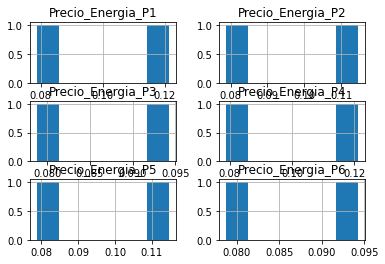

In [72]:
df = result
df.hist(bins=6)

<AxesSubplot:>

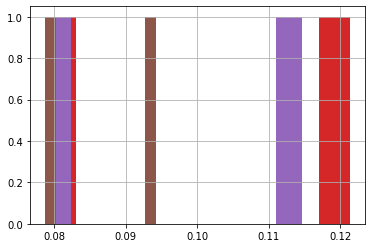

In [71]:


df['Precio_Energia_P1'].hist()
df['Precio_Energia_P2'].hist()
df['Precio_Energia_P3'].hist()
df['Precio_Energia_P4'].hist()
df['Precio_Energia_P5'].hist()
df['Precio_Energia_P6'].hist()

In [65]:
sns.countplot(x=result)
plt.show()

NameError: name 'sns' is not defined

#### Pie Chart del Consumo

###### Variables

In [51]:
lista_consumo_cliente = list(bd_consumo_energia_cliente[bd_consumo_energia_cliente.columns[-1]][0:6])
lista_consumo_cliente

[4569, 15902, 10843, 5577, 4667, 12156]

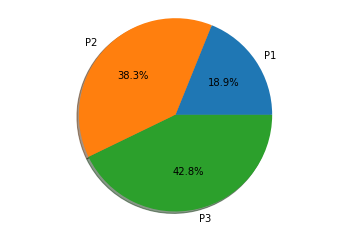

In [52]:
lista_consumo_cliente = list(bd_consumo_energia_cliente[bd_consumo_energia_cliente.columns[-1]][0:6])
labels = ['P1', 'P2', 'P3']
sizes = [lista_consumo_cliente[0]+lista_consumo_cliente[3],lista_consumo_cliente[1]+lista_consumo_cliente[4], lista_consumo_cliente[2] + lista_consumo_cliente[5] ]

plt.pie(sizes, labels=labels, shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.savefig('../Data/Imagenes/pie_chart_consumo_cliente.png', bbox_inches='tight')

ValueError: x must have 2 or fewer dimensions

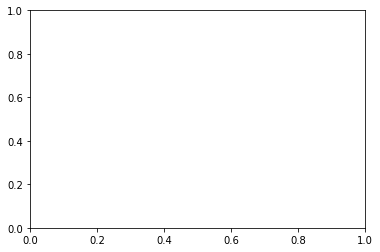

In [67]:

plt.hist([precios_energia_actuales, bins = 6, alpha = 0.5)
plt.show()